In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv("netflix_titles.csv",sep=',')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [112]:
df['country'].isna().sum()

507

In [113]:
df.loc[df['country'].isna(),'country']='No Country'

In [114]:
df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'No Country', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Can

In [115]:
# Potencial solucion para ejercicio 2
#df['country'].str.split(',')

In [116]:
#Ejercicio 2
df['country']=df['country'].apply(lambda x: x.split(', '))
df_explode=df.explode('country')

In [117]:
# Reemplazamos la coma por un valor nulo
df_explode['country']=[i.replace(",","") for i in df_explode['country']]

In [118]:
#Ejercicio 3
df_explode['country'].value_counts().head(5)

country
United States     3297
India              990
United Kingdom     723
No Country         507
Canada             412
Name: count, dtype: int64

In [119]:
#Ejercicio 4
df_explode['date_added']=df_explode['date_added'].str.strip()
df_explode['date_added']=pd.to_datetime(df_explode['date_added'],format="%B %d, %Y")
df_grouped=df_explode.groupby('country',as_index=False).agg({'date_added':[min,max]})
df_grouped.head(10)

/tmp/ipykernel_3259/1204924041.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  df_grouped=df_explode.groupby('country',as_index=False).agg({'date_added':[min,max]})
/tmp/ipykernel_3259/1204924041.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  df_grouped=df_explode.groupby('country',as_index=False).agg({'date_added':[min,max]})


country date_added           
                      min        max
0  Afghanistan 2017-01-01 2017-01-01
1      Albania 2018-05-04 2018-05-04
2      Algeria 2020-06-18 2020-12-26
3       Angola 2020-08-28 2020-08-28
4    Argentina 2016-07-15 2020-11-24
5      Armenia 2017-08-15 2017-08-15
6    Australia 2015-02-15 2021-01-01
7      Austria 2016-11-04 2020-11-11
8   Azerbaijan 2016-12-26 2016-12-26
9      Bahamas 2020-08-31 2020-08-31

In [120]:
# Ejercicio 5
df_grouped_ejercicio5=df_explode.groupby(['country','rating']).agg({'title':'count'}).sort_values(by='title',ascending=False)
df_grouped_ejercicio5

title
country       rating       
United States TV-MA    1034
India         TV-14     542
United States R         539
              TV-14     464
              PG-13     340
...                     ...
Belgium       TV-Y7       1
Bermuda       TV-PG       1
Botswana      TV-PG       1
Brazil        PG-13       1
Namibia       TV-MA       1

[507 rows x 1 columns]

In [121]:
# Ejercicio 6
df_ejercicio6=df_grouped_ejercicio5.reset_index()
df_ejercicio6=df_ejercicio6.loc[df_ejercicio6.groupby(['country'],sort=False)['title'].idxmax()]
df_ejercicio6.to_excel('df_ejercicio6.xlsx')
df_ejercicio6.head()

,country,rating,title
0,United States,TV-MA,1034
1,India,TV-14,542
7,United Kingdom,TV-MA,237
9,No Country,TV-MA,159
10,Spain,TV-MA,156


In [122]:
# Ejercicio 7
df_ejercicio7 = df_explode.loc[(df_explode['release_year']==2020) & (df_explode['country']=='France')]
df_ejercicio7.to_json("df_ejercicio7.json")
df_ejercicio7.to_csv("df_ejercicio7.csv")
df_ejercicio7.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
227,s228,Movie,A Shaun the Sheep Movie: Farmageddon,"Richard Phelan, Will Becher","Justin Fletcher, John Sparkes, Amalia Vitale, ...",France,2020-02-14,2020,G,87 min,"Children & Family Movies, Comedies",Shaun and the flock race to help an adorable a...
512,s513,Movie,Anelka: Misunderstood,Franck Nataf,Nicolas Anelka,France,2020-08-05,2020,TV-14,95 min,"Documentaries, International Movies, Sports Mo...","Inscrutable, incomparable or both? Famed Frenc..."
910,s911,Movie,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,2020-10-08,2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...
1541,s1542,TV Show,Criminal: UK,NaN,"Katherine Kelly, Lee Ingleby, Mark Stanley, Ro...",France,2020-09-16,2020,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",Within the walls of an interrogation room and ...
1559,s1560,Movie,Cuties,Maïmouna Doucouré,"Fathia Youssouf, Médina El Aidi-Azouni, Esther...",France,2020-09-09,2020,TV-MA,96 min,"Dramas, International Movies",Eleven-year-old Amy starts to rebel against he...


In [124]:
#Ejercicio 8
columns=df_explode['country'].value_counts().head(5).index.values
last_10years=np.sort(df_explode['release_year'].unique())[-10:]
df_ejercicio8_raw=df_explode.loc[df_explode['country'].isin(columns) & df_explode['release_year'].isin(last_10years)]
df_ejercicio8_final=df_ejercicio8_raw.pivot_table(
         columns='country',
         index='release_year',
         values='title',
         aggfunc="count",
         margins=True
         )
df_ejercicio8_final

country,Canada,India,No Country,United Kingdom,United States,All
release_year,,,,,,
2012,14,39,11,22,90,176
2013,8,56,10,27,103,204
2014,28,56,19,43,123,269
2015,31,70,39,63,199,402
2016,54,79,62,98,333,626
2017,57,111,54,101,437,760
2018,64,102,100,90,442,798
2019,43,90,97,59,427,716
2020,41,68,63,68,377,617


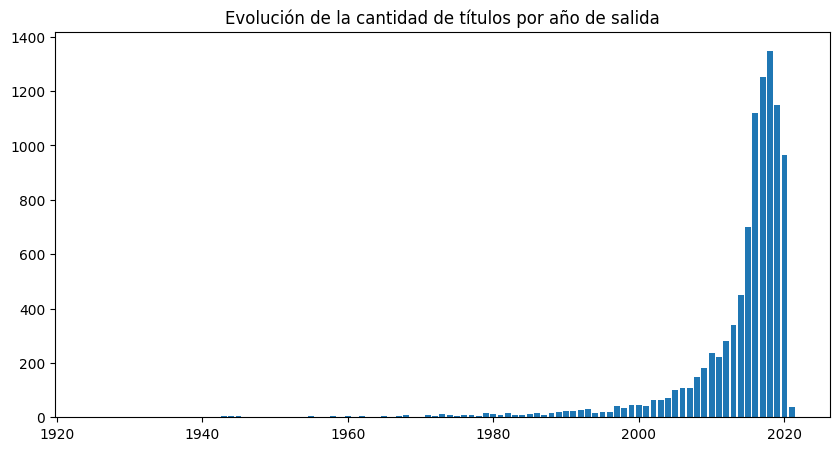

In [138]:
# Ejercicio 9
plt.figure(figsize=(10,5))
plt.bar(x=df_explode['release_year'].value_counts().sort_index().index,
        height=df_explode['release_year'].value_counts().sort_index().values)
plt.title("Evolución de la cantidad de títulos por año de salida")
#plt.savefig("ejercio_9_plot.jpg")
plt.show()